# Question 1:

A wholesale distributor operating in different regions of Portugal has information on annual spending of several items in their stores across different regions and channels. The data consists of 440 large retailers’ annual spending on 6 different varieties of products in 3 different regions (Lisbon, Oporto, Other) and across different sales channel (Hotel, Retail).

(Here, i have used df_1 for denoting the variable for qustion 1)
(For Question 2 and Question 3, the variable will be df_2 and df_3 respectively)

In [14]:
import os 
os.getcwd()
# by help of this command, we can find the current directory of your system which it makes it easy for us, so that we can save the file accordingly which we want to read.

'C:\\Users\\HP\\OneDrive\\Desktop\\GRATELAKES\\Project\\Module 2'

In [2]:
import numpy as np
import pandas as pd
pd.set_option('display.float_format', lambda x: '%.2f' % x)
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as stats
from scipy.stats import ttest_1samp, ttest_ind
from statsmodels.stats.power import ttest_power
import copy
import os

In [3]:
from warnings import filterwarnings         # This is mainly used to avoid the unnecessary warnings which come while running the code due to the changes in the python liabrary 
filterwarnings("ignore")

In [4]:
df_1=pd.read_csv('Wholesale Customer.csv')  # by help of this statement, we are able to read the file for question 1

# 1.1 Use methods of descriptive statistics to summarize data. Which Region and which Channel spent the most? Which Region and which Channel spent the least?

In [5]:
df_1.head()
# by help of this command, we are able to get the results of first n rows || helps us to get us know about the tyoe of the data 

,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,1,Retail,Other,12669,9656,7561,214,2674,1338
1,2,Retail,Other,7057,9810,9568,1762,3293,1776
2,3,Retail,Other,6353,8808,7684,2405,3516,7844
3,4,Hotel,Other,13265,1196,4221,6404,507,1788
4,5,Retail,Other,22615,5410,7198,3915,1777,5185


In [10]:
df_1.info()
# 'info()' method prints information about a DataFrame including the index dtype and column dtypes, non-null values and memory usage

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Buyer/Spender     440 non-null    int64 
 1   Channel           440 non-null    object
 2   Region            440 non-null    object
 3   Fresh             440 non-null    int64 
 4   Milk              440 non-null    int64 
 5   Grocery           440 non-null    int64 
 6   Frozen            440 non-null    int64 
 7   Detergents_Paper  440 non-null    int64 
 8   Delicatessen      440 non-null    int64 
dtypes: int64(7), object(2)
memory usage: 31.1+ KB


In [12]:
df_1.shape
#'shape' is a property associated with DataFrame. It returns a tuple representing the dimensionality of the DataFrame. First value is giving number of rows and second value is giving number of columns.

(440, 9)

In [26]:
df_1.isnull().sum()
# 'isnull()' method detects missing values. It returns a boolean same-sized object indicating if the values are NA. NA values, gets mapped to True values.Everything else gets mapped to False values.

Buyer/Spender       0
Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicatessen        0
dtype: int64

In [27]:
df_1.isnull().values.any()

False

In [28]:
df_1.describe()
#'describe()' method generates descriptive statistics. Descriptive statistics include those that summarize the central tendency, dispersion and shape of a dataset's distribution, excluding 'NaN' values

,Buyer/Spender,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.00,440.00,440.00,440.00,440.00,440.00,440.00
mean,220.50,12000.30,5796.27,7951.28,3071.93,2881.49,1524.87
std,127.16,12647.33,7380.38,9503.16,4854.67,4767.85,2820.11
min,1.00,3.00,55.00,3.00,25.00,3.00,3.00
25%,110.75,3127.75,1533.00,2153.00,742.25,256.75,408.25
50%,220.50,8504.00,3627.00,4755.50,1526.00,816.50,965.50
75%,330.25,16933.75,7190.25,10655.75,3554.25,3922.00,1820.25
max,440.00,112151.00,73498.00,92780.00,60869.00,40827.00,47943.00


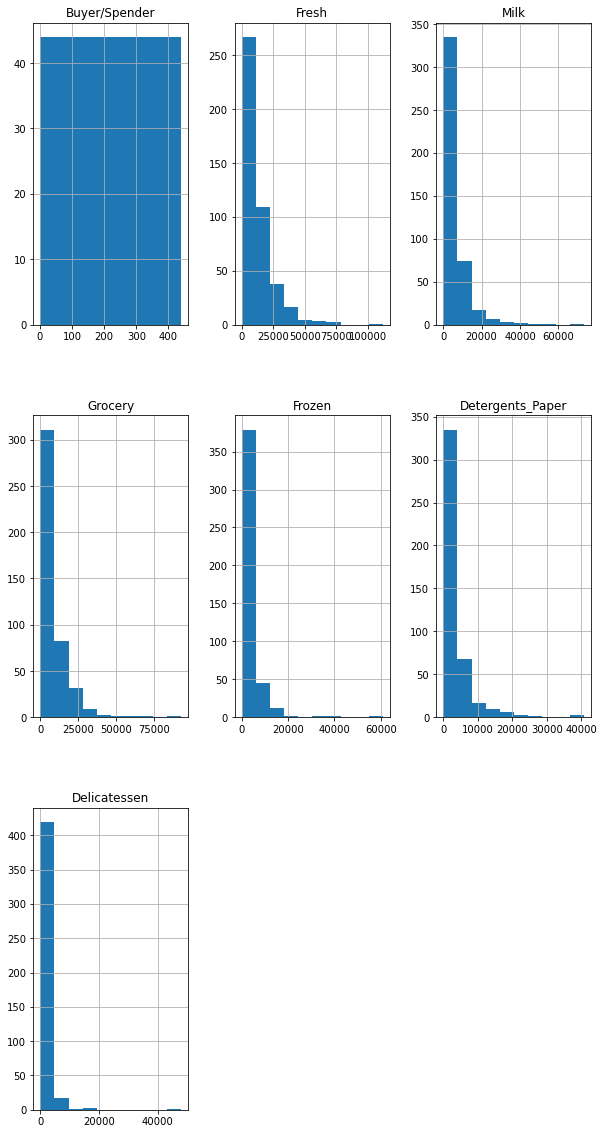

In [30]:
df_1.hist(figsize=(10,20))
plt.show()
# here by this, we are able to get the graphical representation of the data in the form of histogram

In [14]:
df_1.skew()

Buyer/Spender       0.00
Fresh               2.56
Milk                4.05
Grocery             3.59
Frozen              5.91
Detergents_Paper    3.63
Delicatessen       11.15
dtype: float64

In [15]:
df=df_1.groupby('Channel').sum()
df
# here we have collected all the unique values with their sum under channel segment itself 

,Buyer/Spender,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Channel,,,,,,,
Hotel,71034,4015717,1028614,1180717,1116979,235587,421955
Retail,25986,1264414,1521743,2317845,234671,1032270,248988


In [16]:
df1=df.drop(['Buyer/Spender'],axis=1)
df1
# here we have removed the buyer/spender column from the list and have stored in another dataframe 

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Channel,,,,,,
Hotel,4015717,1028614,1180717,1116979,235587,421955
Retail,1264414,1521743,2317845,234671,1032270,248988


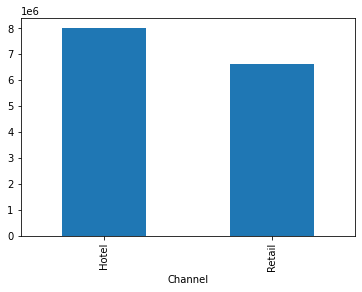

In [32]:
df1.sum(axis=1).plot(kind='bar')
plt.show()
# here we have drawn the bar graph for the complete data set for the case of Hotel and retailer

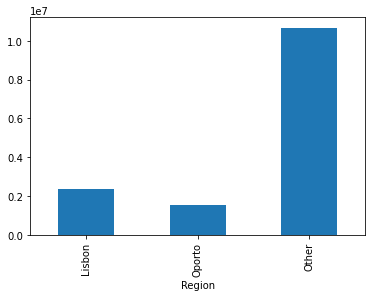

In [31]:
df2=df_1.groupby('Region').sum().drop(['Buyer/Spender'],axis=1)
df2.sum(axis=1).plot(kind='bar')
plt.show()
# here we have drawn the bar graph for Region section 
# we have also formed a new data frame and have stored the unique values which are present under the section of Region
# then we have also dropped the values of Buyer/Spender and have plotted the graph to get the results of the same.

## Here from the above graphs we are easily able to get the following results.
Expenditure most:
Region: Others
Channel: Hotel

Expenditure least:
Region: Oporto
Channel: Retailers

# 1.2 There are 6 different varieties of items that are considered. Describe and comment/explain all the varieties across Region and Channel? Provide a detailed justification for your answer.

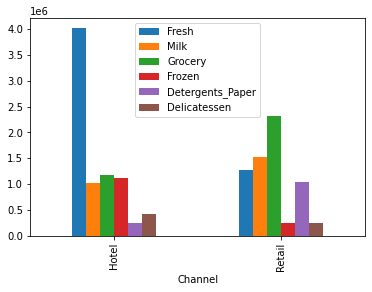

In [36]:
df1=df_1.groupby('Channel').sum().drop(['Buyer/Spender'],axis=1).plot(kind='bar')
plt.show()
# here we have dropped the section for Buyer/spender from channel and have plotted the bar graph of Hotel and retail mentioning all the products separately for each

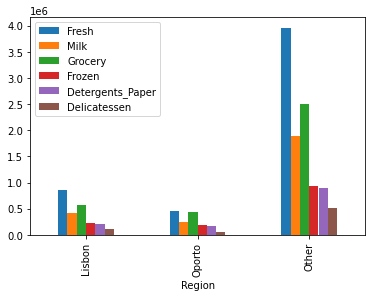

In [37]:
df2=df_1.groupby('Region').sum().drop(['Buyer/Spender'],axis=1).plot(kind='bar')
plt.show()
# here we have dropped the section for Buyer/spender from Region and have plotted the bar graph of Lisbon ,Oporto and other mentioning all the products separately for each

In [42]:
df_1.skew()

Buyer/Spender       0.00
Fresh               2.56
Milk                4.05
Grocery             3.59
Frozen              5.91
Detergents_Paper    3.63
Delicatessen       11.15
dtype: float64

## Here from the above following results, we get to know that:
1) Region:
   a) Best investment is Fresh products 
   b) Delicatessen remains last for all the three regions.
2) Channel:
   a) For Hotels Fresh product still remains the best investment 
   b) Least attractive is of detergents 
   c) Groceries are the best investment for the retailers 
   
We can also conclude by stating that Fresh products, milk and groceries are really good to invest in. 

# 1.3 On the basis of a descriptive measure of variability, which item shows the most inconsistent behaviour? Which items show the least inconsistent behaviour?

In [43]:
df3=df_1.describe()
df3

,Buyer/Spender,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.00,440.00,440.00,440.00,440.00,440.00,440.00
mean,220.50,12000.30,5796.27,7951.28,3071.93,2881.49,1524.87
std,127.16,12647.33,7380.38,9503.16,4854.67,4767.85,2820.11
min,1.00,3.00,55.00,3.00,25.00,3.00,3.00
25%,110.75,3127.75,1533.00,2153.00,742.25,256.75,408.25
50%,220.50,8504.00,3627.00,4755.50,1526.00,816.50,965.50
75%,330.25,16933.75,7190.25,10655.75,3554.25,3922.00,1820.25
max,440.00,112151.00,73498.00,92780.00,60869.00,40827.00,47943.00


In [44]:
df3.loc['cv']=df3.loc['std']/df3.loc['mean']
df3

,Buyer/Spender,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.00,440.00,440.00,440.00,440.00,440.00,440.00
mean,220.50,12000.30,5796.27,7951.28,3071.93,2881.49,1524.87
std,127.16,12647.33,7380.38,9503.16,4854.67,4767.85,2820.11
min,1.00,3.00,55.00,3.00,25.00,3.00,3.00
25%,110.75,3127.75,1533.00,2153.00,742.25,256.75,408.25
50%,220.50,8504.00,3627.00,4755.50,1526.00,816.50,965.50
75%,330.25,16933.75,7190.25,10655.75,3554.25,3922.00,1820.25
max,440.00,112151.00,73498.00,92780.00,60869.00,40827.00,47943.00
cv,0.58,1.05,1.27,1.20,1.58,1.65,1.85


## Here from the above results we can easily infer that:

The differences in the minimum/maximum values and mean of the products is high so we are using Coefficient of variance to make a conclusion. 
The CV (coefficient of variance) is lowest for Fresh products so it is least inconsistent while Delicatessen is most inconsistence. 
(skewness is also considered)

# 1.4 Are there any outliers in the data? Back up your answer with a suitable plot/technique with the help of detailed comments.

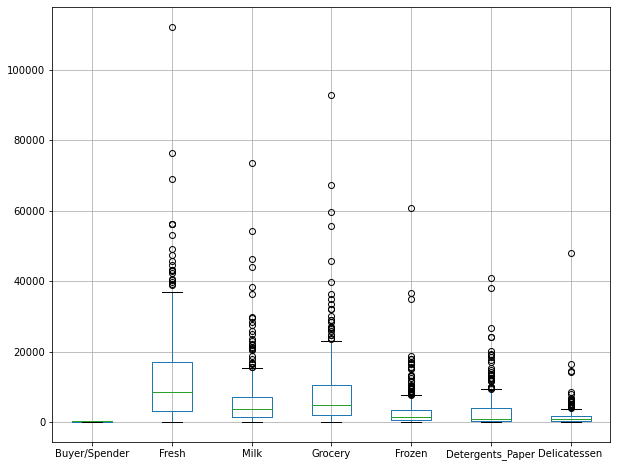

In [45]:
plt.figure(figsize=(10,8))
df_1.boxplot()
plt.show()

## From the above results, we can easily say that:

There are few outliers which are present in the data. 
The black colored spots which are pesent above the box plot are the outliers itself which are present in the data.
The highest individual value of the outlier is present in the Fresh segment.

# 1.5 On the basis of your analysis, what are your recommendations for the business? How can your analysis help the business to solve its problem? Answer from the business perspective

In [46]:
df3.loc['cv']=df3.loc['std']/df3.loc['mean']
df3

,Buyer/Spender,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.00,440.00,440.00,440.00,440.00,440.00,440.00
mean,220.50,12000.30,5796.27,7951.28,3071.93,2881.49,1524.87
std,127.16,12647.33,7380.38,9503.16,4854.67,4767.85,2820.11
min,1.00,3.00,55.00,3.00,25.00,3.00,3.00
25%,110.75,3127.75,1533.00,2153.00,742.25,256.75,408.25
50%,220.50,8504.00,3627.00,4755.50,1526.00,816.50,965.50
75%,330.25,16933.75,7190.25,10655.75,3554.25,3922.00,1820.25
max,440.00,112151.00,73498.00,92780.00,60869.00,40827.00,47943.00
cv,0.58,1.05,1.27,1.20,1.58,1.65,1.85


## We can conclude that:

The most consistent are fresh products and investing in them is the best. There is a lot of deviation in data which we can see from the above tabular result. 
Eg: The minimum and maximum values in the data have large difference and mean of different products also represents deviation.

For the same thing, we have also made use of coefficient of variance for our analysis along with various other plots and skewness.

Below mentioned are further more analysis about the data:
1) Region:
   a) Best investment is Fresh products 
   b) Delicatessen remains last for all the three regions.
2) Channel:
   a) For Hotels Fresh product still remains the best investment 
   b) Least attractive is of detergents 
   c) Groceries are the best investment for the retailers 
   
We can also conclude by stating that Fresh products, milk and groceries are really good to invest in. 

# Question 2:

The Student News Service at Clear Mountain State University (CMSU) has decided to gather data about the undergraduate students that attend CMSU. CMSU creates and distributes a survey of 14 questions and receives responses from 62 undergraduates (stored in the Survey data set).
Here we have made use of df_2 for representing the data

In [48]:
df_2 = pd.read_csv('Survey-1.csv')

In [50]:
df_2.head()

,ID,Gender,Age,Class,Major,Grad Intention,GPA,Employment,Salary,Social Networking,Satisfaction,Spending,Computer,Text Messages
0,1,Female,20,Junior,Other,Yes,2.90,Full-Time,50.00,1,3,350,Laptop,200
1,2,Male,23,Senior,Management,Yes,3.60,Part-Time,25.00,1,4,360,Laptop,50
2,3,Male,21,Junior,Other,Yes,2.50,Part-Time,45.00,2,4,600,Laptop,200
3,4,Male,21,Junior,CIS,Yes,2.50,Full-Time,40.00,4,6,600,Laptop,250
4,5,Male,23,Senior,Other,Undecided,2.80,Unemployed,40.00,2,4,500,Laptop,100


## 2.1.1. Gender and Major

In [51]:
pd.crosstab(df_2['Gender'],df_2['Major'])

Major,Accounting,CIS,Economics/Finance,International Business,Management,Other,Retailing/Marketing,Undecided
Gender,,,,,,,,
Female,3,3,7,4,4,3,9,0
Male,4,1,4,2,6,4,5,3


## 2.1.2. Gender and Grad Intention

In [52]:
pd.crosstab(df_2['Gender'],df_2['Grad Intention'])

Grad Intention,No,Undecided,Yes
Gender,,,
Female,9,13,11
Male,3,9,17


## 2.1.3. Gender and Employment

In [53]:
pd.crosstab(df_2['Gender'],df_2['Employment'])

Employment,Full-Time,Part-Time,Unemployed
Gender,,,
Female,3,24,6
Male,7,19,3


## 2.1.4. Gender and Computer

In [54]:
pd.crosstab(df_2['Gender'],df_2['Computer'])

Computer,Desktop,Laptop,Tablet
Gender,,,
Female,2,29,2
Male,3,26,0


# 2.2. Assume that the sample is a representative of the population of CMSU. Based on the data, answer the following question:

In [55]:
df_2['Gender'].value_counts()

Female    33
Male      29
Name: Gender, dtype: int64

# 2.2.1 What is the probability that a randomly selected CMSU student will be male?

In [56]:
print('Probability that a randomly selected CMSU student will be male:',29/len(df_2['Gender']))

Probability that a randomly selected CMSU student will be male: 0.46774193548387094


# 2.2.2 What is the probability that a randomly selected CMSU student will be female?

In [57]:
print('Probability that a randomly selected CMSU student will be female:',33/len(df_2['Gender']))

Probability that a randomly selected CMSU student will be female: 0.532258064516129


# 2.3. Assume that the sample is a representative of the population of CMSU. Based on the data, answer the following question:

In [58]:
pd.crosstab(df_2['Gender'],df_2['Major'])

Major,Accounting,CIS,Economics/Finance,International Business,Management,Other,Retailing/Marketing,Undecided
Gender,,,,,,,,
Female,3,3,7,4,4,3,9,0
Male,4,1,4,2,6,4,5,3


## Below is the Conditional Probablity formula:

P (Major | male) = P (Major ∩ male)/ P(male)

P (Major | female) = P (Major ∩ female)/ P(female)

# 2.3.1 Find the conditional probability of different majors among the male students in CMSU.

In [59]:
print('Probability of male students in different majors is as follows:')
print('Probability of male students in Accounting:',4/29)
print('Probability of male students in CIS:',1/29)
print('Probability of male students in Economics/Finance:',4/29)
print('Probability of male students in International Business:',2/29)
print('Probability of male students in Management:',6/29)
print('Probability of male students in Others:',4/29)
print('Probability of male students in Retailing/Marketing:',5/29)
print('Probability of male students in Undecided:',3/29)

 Probability of male students in different majors is as follows:
Probability of male students in Accounting: 0.13793103448275862
Probability of male students in CIS: 0.034482758620689655
Probability of male students in Economics/Finance: 0.13793103448275862
Probability of male students in International Business: 0.06896551724137931
Probability of male students in Management: 0.20689655172413793
Probability of male students in Others: 0.13793103448275862
Probability of male students in Retailing/Marketing: 0.1724137931034483
Probability of male students in Undecided: 0.10344827586206896


# 2.3.2 Find the conditional probability of different majors among the female students of CMSU.

In [60]:
print('Probability of Female students in different majors is as follows:')
print('Probability of Female students in Accounting:',3/33)
print('Probability of Female students in CIS:',3/33)
print('Probability of Female students in Economics/Finance:',7/33)
print('Probability of Female students in International Business:',4/33)
print('Probability of Female students in Management:',4/33)
print('Probability of Female students in Others:',3/33)
print('Probability of Female students in Retailing/Marketing:',9/33)
print('Probability of Female students in Undecided:',0/33)

 Probability of Female students in different majors is as follows:
Probability of Female students in Accounting: 0.09090909090909091
Probability of Female students in CIS: 0.09090909090909091
Probability of Female students in Economics/Finance: 0.21212121212121213
Probability of Female students in International Business: 0.12121212121212122
Probability of Female students in Management: 0.12121212121212122
Probability of Female students in Others: 0.09090909090909091
Probability of Female students in Retailing/Marketing: 0.2727272727272727
Probability of Female students in Undecided: 0.0


# 2.4. Assume that the sample is a representative of the population of CMSU. Based on the data, answer the following question:

# 2.4.1 Find the probability That a randomly chosen student is a male and intends to graduate.

In [61]:
print("P(Intent to graduate ∩ Male) = P (Intent to graduate| Male) x P (Male) = ",(17/29) * (29/62))

P(Intent to graduate ∩ Male) = P (Intent to graduate| Male) x P (Male) =  0.27419354838709675


# 2.4.2 Find the probability that a randomly selected student is a female and does NOT have a laptop.

In [62]:
print("P(Females with no laptop ∩ Female) = P (Females with no laptop| Femal) x P (Female) = ",(4/33) * (33/62))

P(Females with no laptop ∩ Female) = P (Females with no laptop| Femal) x P (Female) =  0.06451612903225806


# 2.5. Assume that the sample is a representative of the population of CMSU. Based on the data, answer the following question:

In [63]:
pd.crosstab(df_2['Gender'],df_2['Employment'])

Employment,Full-Time,Part-Time,Unemployed
Gender,,,
Female,3,24,6
Male,7,19,3


# 2.5.1 Find the probability that a randomly chosen student is a male or has a full-time employment

P(male U Fulltime)= P(male) + P(Fulltime) - P(male intersection Fulltime)

In [64]:
print("P(male U Fulltime)= P(male) + P(Fulltime) - P(male intersection Fulltime) = ",(29/62) + (10/62) - (7/62))

P(male U Fulltime)= P(male) + P(Fulltime) - P(male intersection Fulltime) =  0.5161290322580645


# 2.5.2 Find the conditional probability that given a female student is randomly chosen, she is majoring in international business or management.

P(A OR B) = P(A) + P(B) as they are mutually exclusive

In [65]:
print("P(International Business OR Management| Female)= P(International Business) + P(Management) = ",(4/33) + (4/33))

P(International Business OR Management| Female)= P(International Business) + P(Management) =  0.24242424242424243


# 2.6 Construct a contingency table of Gender and Intent to Graduate at 2 levels (Yes/No). The Undecided students are not considered now and the table is a 2x2 table. Do you think graduate intention and being female are independent events?

In [66]:
dfv1=pd.crosstab(df_2['Gender'],df_2['Grad Intention']).drop(['Undecided'], axis=1)
dfv1

Grad Intention,No,Yes
Gender,,
Female,9,11
Male,3,17


In [67]:
print("Condition for events being Independent: P(F ∩ Yes) = P(F)P(Yes)")
print("P(F)= ", (33/40))
print("P(Yes)= ", (28/40))
print("P(F ∩ Yes)= ", (11/40))
print("P(F)P(Yes)= ", (33/40)*(28/40))
print("Graduate intention and being female are not independent events")

Condition for events being Independent: P(F ∩ Yes) = P(F)P(Yes)
P(F)=  0.825
P(Yes)=  0.7
P(F ∩ Yes)=  0.275
P(F)P(Yes)=  0.5774999999999999
Graduate intention and being female are not independent events


# 2.7 Note that there are four numerical (continuous) variables in the data set, GPA, Salary, Spending and Text Messages. Answer the following questions based on the data.

# 2.7.1 If a student is chosen randomly, what is the probability that his/her GPA is less than 3?

In [68]:
(df_2['GPA']<3).sum()

17

In [69]:
print("P(Probability of student with GPA less than 3)= No of students with GPA less than 3 / Total students: ", (17/62))

P(Probability of student with GPA less than 3)= No of students with GPA less than 3 / Total students:  0.27419354838709675


# 2.7.2 Find conditional probability that a randomly selected male earns 50 or more. Find conditional probability that a randomly selected female earns 50 or more.

In [70]:
pd.crosstab(df_2['Gender'],df_2['Salary']>=50)

Salary,False,True
Gender,,
Female,15,18
Male,15,14


In [71]:
print("P(Probability of male earns 50 or more )= No of males with 50 and above salary / Total number of males: ", (14/29))

P(Probability of male earns 50 or more )= No of males with 50 and above salary / Total number of males:  0.4827586206896552


In [72]:
print("P(Probability of females earns 50 or more )= No of females with 50 and above salary / Total number of females: ", (18/33))

P(Probability of females earns 50 or more )= No of females with 50 and above salary / Total number of females:  0.5454545454545454


# 2.8. Note that there are four numerical (continuous) variables in the data set, GPA, Salary, Spending and Text Messages. For each of them comment whether they follow a normal distribution.

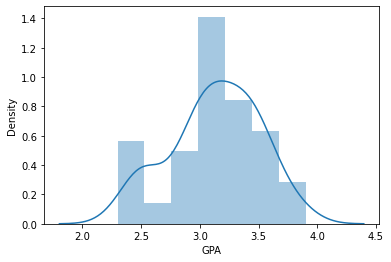

In [75]:
sns.distplot(df_2['GPA'])
plt.show()

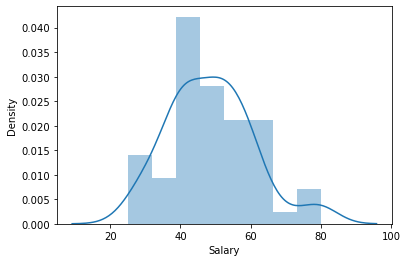

In [76]:
sns.distplot(df_2['Salary'])
plt.show()

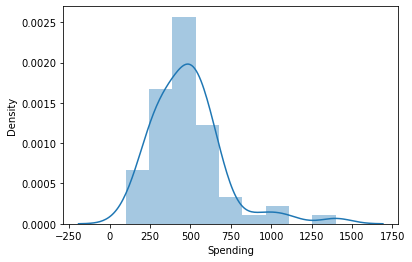

In [77]:
sns.distplot(df_2['Spending'])
plt.show()

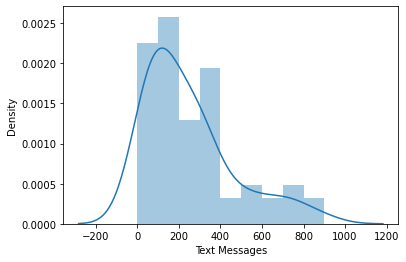

In [78]:
sns.distplot(df_2['Text Messages'])
plt.show()

In [79]:
df_2.describe()

,ID,Age,GPA,Salary,Social Networking,Satisfaction,Spending,Text Messages
count,62.00,62.00,62.00,62.00,62.00,62.00,62.00,62.00
mean,31.50,21.13,3.13,48.55,1.52,3.74,482.02,246.21
std,18.04,1.43,0.38,12.08,0.84,1.21,221.95,214.47
min,1.00,18.00,2.30,25.00,0.00,1.00,100.00,0.00
25%,16.25,20.00,2.90,40.00,1.00,3.00,312.50,100.00
50%,31.50,21.00,3.15,50.00,1.00,4.00,500.00,200.00
75%,46.75,22.00,3.40,55.00,2.00,4.00,600.00,300.00
max,62.00,26.00,3.90,80.00,4.00,6.00,1400.00,900.00


In [80]:
df_2.skew()

ID                   0.00
Age                  0.74
GPA                 -0.31
Salary               0.53
Social Networking    0.96
Satisfaction        -0.51
Spending             1.59
Text Messages        1.30
dtype: float64

## Below are the outcomes which we get from the above results:

1) GPA: Normally distributed
2) Salary: Not Normally Distributed (due to the skewness and stretched tail in displot).
3) Spending: Not Normally Distributed (due to the skewness and stretched tail in displot).
4) Text Messages: Not Normally Distributed (due to the skewness and stretched tail in displot).

# Question 3:

An important quality characteristic used by the manufacturers of ABC asphalt shingles is the amount of moisture the shingles contain when they are packaged. Customers may feel that they have purchased a product lacking in quality if they find moisture and wet shingles inside the packaging.   In some cases, excessive moisture can cause the granules attached to the shingles for texture and coloring purposes to fall off the shingles resulting in appearance problems. To monitor the amount of moisture present, the company conducts moisture tests. A shingle is weighed and then dried. The shingle is then reweighed, and based on the amount of moisture taken out of the product, the pounds of moisture per 100 square feet are calculated. The company would like to show that the mean moisture content is less than 0.35 pounds per 100 square feet.

In [11]:
df_3=pd.read_csv('A & B shingles-1.csv')

## CASE 1:
For the A shingles, the null and alternative hypothesis to test whether the population mean moisture content is less than 0.35 pound per 100 square feet is given:
H0<=0.35
H1>0.35

## CASE 2:
For the B shingles, the null and alternative hypothesis to test whether the population mean moisture content is less than 0.35 pound per 100 square feet is given:
H0<=0.35
H1>0.35

# 3.1 Do you think there is evidence that mean moisture contents in both types of shingles are within the permissible limits? State your conclusions clearly showing all steps.

In [13]:
# Consideration for A shilings
# H0 <=0.35 (Null Hypothesis)
# HA > 0.35 (Alternate Hypothesis)
# alpha = 0.05

t, p_value = ttest_1samp(df_3['A'], 0.35)     # Performing T Test
print(t, p_value)

-1.4735046253382782 0.14955266289815025


In [15]:
p1=p_value / 2
p1

0.07477633144907513

Here we get that p1(A) > 0.05, thus we cannot reject the null Hypothesis.
Thus we can say that we don't have enough evidence to prove that mean moisture content in sample A is less than 0.35.

In [17]:
# Consideration for B shilings
# H0: Mean Moisture content <=0.35
# HA: Mean Moisture content > 0.35
# alpha = 0.05

t, p_value = ttest_1samp(df_3['B'], 0.35,nan_policy='omit')
print(t, p_value)

-3.1003313069986995 0.004180954800638365


In [18]:
p2=p_value / 2
p2

0.0020904774003191826

Here we get that p2(B) < 0.05, thus we will reject the null Hypothesis.
Thus we can say that we have enough evidence to conclude that mean moisture in sample B is not less than 0.35.

# 3.2 Do you think that the population means for shingles A and B are equal? Form the hypothesis and conduct the test of the hypothesis. What assumption do you need to check before the test for equality of means is performed?

In [22]:
# H0: Mean of A = Mean of B (Null Hypothesis)
# H1: Mean of A is not equal to Mean of B (Alternate Hypothesis)
# Alpha= 0.05

t, p_value = ttest_ind(df_3['A'],df_3['B'], equal_var= True, nan_policy='omit')
print(t, p_value)

1.2896282719661123 0.2017496571835306


Here P value > 0.05 hence, we will not reject H0.
Thus, we can say that the population means for samples A and B are equal.